**Decision Trees and Hyperparameters**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

In [2]:
path = 'C:/Users/Lenovo/Downloads/weatherAUS.csv.zip'
weather_df = pd.read_csv(path)

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#Drop all row with na values
weather_df.dropna(subset = ['RainTomorrow'] , inplace = True)

In [5]:
import sklearn
from sklearn.model_selection import train_test_split

<Axes: title={'center': 'No of rows every year'}, xlabel='Date', ylabel='count'>

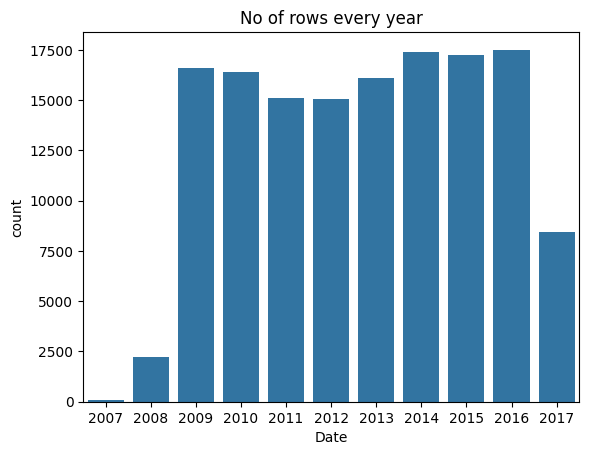

In [6]:
plt.title('No of rows every year')
sns.countplot(x = pd.to_datetime(weather_df.Date).dt.year)

In [7]:
year = pd.to_datetime(weather_df.Date).dt.year
train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

In [8]:
train_df.shape , val_df.shape

((98988, 23), (17231, 23))

**Input and Target Columns**

In [9]:
input_cols = list(weather_df.columns[1:-1])
target_cols = 'RainTomorrow'

In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [11]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [12]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [13]:
#Identify numeric cols and categorical cols in dataframe
numeric_cols = weather_df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = weather_df.select_dtypes('object').columns.tolist()[1:-1]

In [14]:
numeric_cols , categorical_cols

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

**Imputing Missing numeric Values**

In [15]:
train_inputs[numeric_cols].isna().sum()

MinTemp            434
MaxTemp            198
Rainfall          1000
Evaporation      37110
Sunshine         40696
WindGustSpeed     6902
WindSpeed9am      1133
WindSpeed3pm      1140
Humidity9am       1265
Humidity3pm       1186
Pressure9am       9345
Pressure3pm       9309
Cloud9am         35764
Cloud3pm         36766
Temp9am            783
Temp3pm            663
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy = 'mean').fit(weather_df[numeric_cols])

In [18]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [19]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**Scaling Numeric Features**

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler().fit(weather_df[numeric_cols])

In [22]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [23]:
train_inputs[1:10]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,No
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,No
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,No
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No
5,Albury,0.544811,0.652174,0.000539,0.037723,0.525852,WNW,0.387597,W,W,...,0.275862,0.55,0.23,0.474380,0.4528,0.493021,0.500352,0.586498,0.658349,No
6,Albury,0.537736,0.563327,0.000000,0.037723,0.525852,W,0.341085,SW,W,...,0.275862,0.49,0.19,0.480992,0.4976,0.111111,0.500352,0.533755,0.575816,No
7,Albury,0.382075,0.595463,0.000000,0.037723,0.525852,W,0.224806,SSE,W,...,0.195402,0.48,0.19,0.543802,0.5280,0.493021,0.500352,0.495781,0.593090,No
8,Albury,0.429245,0.693762,0.000000,0.037723,0.525852,NNW,0.573643,SE,NW,...,0.321839,0.42,0.09,0.469421,0.4240,0.493021,0.500352,0.537975,0.683301,No
9,Albury,0.509434,0.659735,0.003774,0.037723,0.525852,W,0.170543,S,SSE,...,0.126437,0.58,0.27,0.438017,0.4576,0.493021,0.500352,0.575949,0.644914,Yes


**Encoding Categorical Data**

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
train_df[categorical_cols].fillna('Unknown')
val_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols].fillna('Unknown')

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
2498,Albury,ENE,Unknown,ESE,No
2499,Albury,SSE,SSE,SE,No
2500,Albury,ENE,ESE,ENE,Yes
2501,Albury,SSE,SE,SSE,Yes
2502,Albury,ENE,SE,SSE,Yes
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [26]:
encoder = OneHotEncoder(sparse_output = False , handle_unknown = 'ignore').fit(weather_df[categorical_cols])

In [27]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [28]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [29]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17172\3778302136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17172\3778302136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17172\3778302136.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [30]:
train_inputs[1:5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
1,Albury,0.375000,0.565217,0.000000,0.037723,0.525852,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037723,0.525852,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037723,0.525852,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037723,0.525852,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

**Training use DecisionTreeClassifier from sklearn.tree to train deicison tree**

In [32]:
#DecisionTreeRegressor if Regression Problem
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier(random_state = 42)

In [34]:
model.fit(x_train , train_targets)

DecisionTreeClassifier(random_state=42)

In [35]:
predictions = model.predict(x_train)

In [36]:
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [37]:
pd.value_counts(predictions) , pd.value_counts(train_targets)#Gives count of unique values in list

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17172\504328433.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(predictions) , pd.value_counts(train_targets)#Gives count of unique values in list
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17172\504328433.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(predictions) , pd.value_counts(train_targets)#Gives count of unique values in list


(No     76707
 Yes    22281
 Name: count, dtype: int64,
 RainTomorrow
 No     76705
 Yes    22283
 Name: count, dtype: int64)

In [38]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [39]:
accuracy_score(predictions , train_targets)

0.9999797955307714

In [40]:
train_prob = model.predict_proba(x_train)

In [41]:
train_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], shape=(98988, 2))

In [42]:
model.score(x_val , val_targets)

0.7921188555510418

In [43]:
#Our Model has Overfitted
from sklearn.tree import plot_tree , export_text

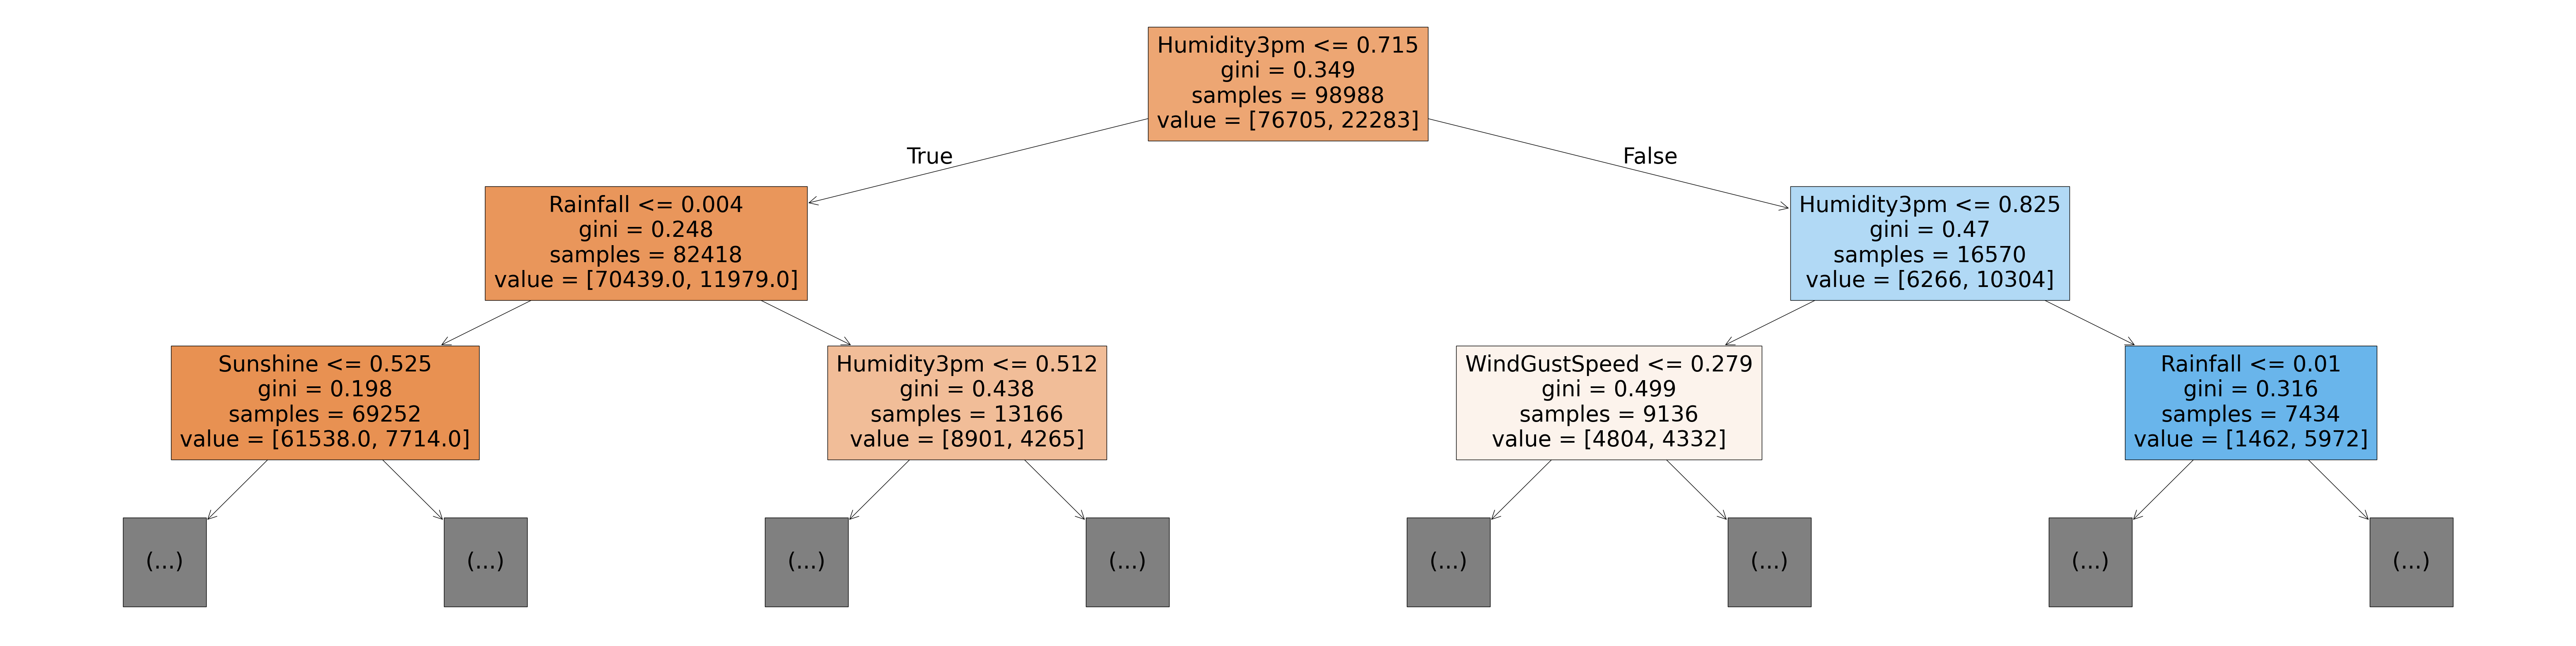

In [44]:
plt.figure(figsize = (80,20))
plot_tree(model , feature_names = x_train.columns , max_depth = 2 , filled = True);

In [45]:
?plot_tree

Signature:
plot_tree(
    decision_tree,
    *,
    max_depth=None,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None,
)
Docstring:
Plot a decision tree.

The sample counts that are shown are weighted with any sample_weights that
might be present.

The visualization is fit automatically to the size of the axis.
Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
the size of the rendering.

Read more in the :ref:`User Guide <tree>`.

.. versionadded:: 0.21

Parameters
----------
decision_tree : decision tree regressor or classifier
    The decision tree to be plotted.

max_depth : int, default=None
    The maximum depth of the representation. If None, the tree is fully
    generated.

feature_names : array-like of str, default=None
    Names of each of the features.
    If None, generic names will be used ("x[0]

In [46]:
#Check Depth of tree
model.tree_.max_depth

48

In [47]:
#Importances of Features
pd.DataFrame({'Columns' : x_train.columns , 
              'Importance' : model.feature_importances_}).sort_values('Importance' , ascending = False)[0:10]

,Columns,Importance
9,Humidity3pm,0.261441
11,Pressure3pm,0.062057
2,Rainfall,0.059139
5,WindGustSpeed,0.056333
4,Sunshine,0.049465
8,Humidity9am,0.040218
14,Temp9am,0.035000
0,MinTemp,0.034894
10,Pressure9am,0.034415
1,MaxTemp,0.032361


**HYPERPARAMETER TUNING AND OVERFITTING**

In [48]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [49]:
#Maximum no of layers - hyperparamter
model = DecisionTreeClassifier(max_depth = 3 , random_state = 42)

In [50]:
model.fit(x_train , train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [51]:
#Picking up General Trends
model.score(x_train , train_targets)

0.8291308037337859

In [52]:
model.score(x_val , val_targets)

0.8334397307178921

In [53]:
#Gives classes of Targets
model.classes_

array(['No', 'Yes'], dtype=object)

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsampl

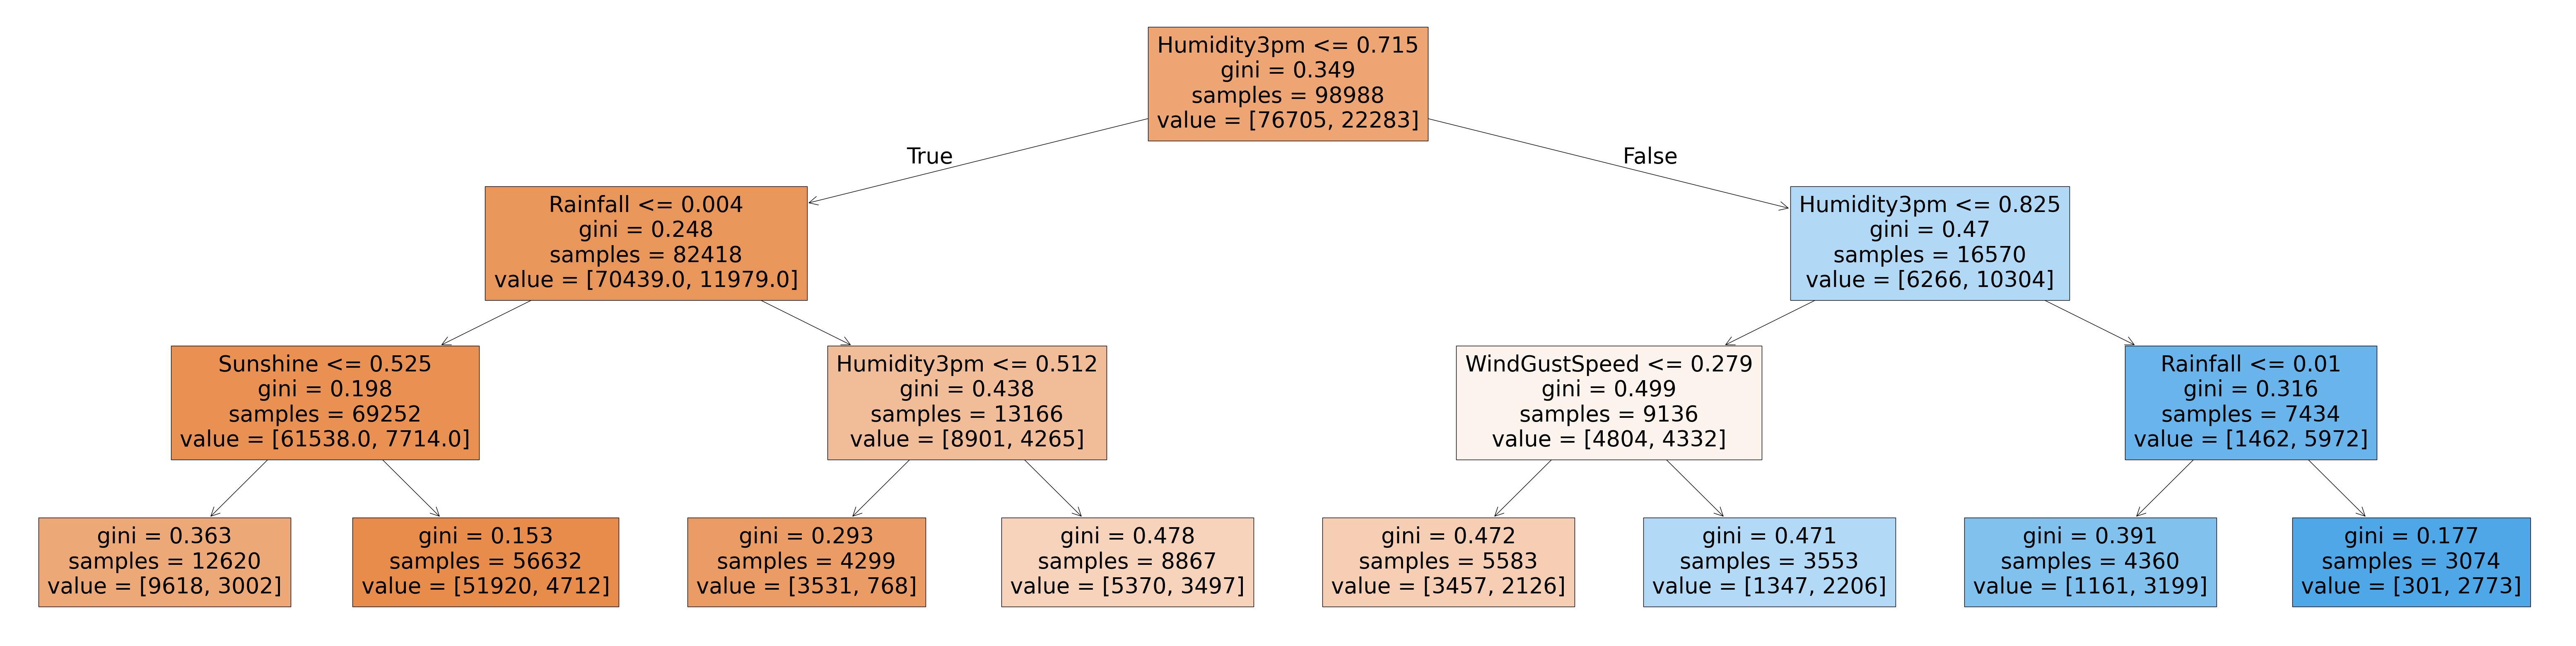

In [54]:
plt.figure(figsize = (80,20))
plot_tree(model , feature_names = x_train.columns , filled = True)

In [55]:
export_text(model , feature_names = list(x_train.columns))

'|--- Humidity3pm <= 0.72\n|   |--- Rainfall <= 0.00\n|   |   |--- Sunshine <= 0.52\n|   |   |   |--- class: No\n|   |   |--- Sunshine >  0.52\n|   |   |   |--- class: No\n|   |--- Rainfall >  0.00\n|   |   |--- Humidity3pm <= 0.51\n|   |   |   |--- class: No\n|   |   |--- Humidity3pm >  0.51\n|   |   |   |--- class: No\n|--- Humidity3pm >  0.72\n|   |--- Humidity3pm <= 0.82\n|   |   |--- WindGustSpeed <= 0.28\n|   |   |   |--- class: No\n|   |   |--- WindGustSpeed >  0.28\n|   |   |   |--- class: Yes\n|   |--- Humidity3pm >  0.82\n|   |   |--- Rainfall <= 0.01\n|   |   |   |--- class: Yes\n|   |   |--- Rainfall >  0.01\n|   |   |   |--- class: Yes\n'

In [56]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth = md,random_state = 42)
    model.fit(x_train , train_targets)
    training_error = 1 - model.score(x_train , train_targets)
    val_error = 1 - model.score(x_val , val_targets)
    return {'Max_Depth' : md , 'Training_Error' : training_error , 'Validation_Error' : val_error}

In [57]:
data = list(max_depth_error(md) for md in range(1,21))

In [58]:
errors_df = pd.DataFrame(data)

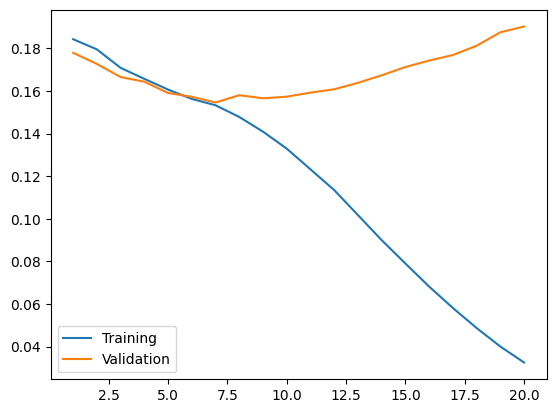

In [59]:
plt.figure()
plt.plot(errors_df['Max_Depth'] , errors_df['Training_Error'])
plt.plot(errors_df['Max_Depth'] , errors_df['Validation_Error'])
plt.legend(['Training' , 'Validation'])

**max_leaf_nodes
Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.**

In [60]:
model = DecisionTreeClassifier(max_leaf_nodes = 128 , random_state = 42)

In [61]:
model.fit(x_train , train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [62]:
model.score(x_train , train_targets) , model.score(x_val , val_targets)

(0.8480421869317493, 0.8442342290058615)

In [63]:
model.tree_.max_depth

12

**TRAINING A RANDOM FOREST**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model = RandomForestClassifier(n_jobs = -1 , random_state = 42)

In [66]:
model.fit(x_train , train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [67]:
model.score(x_train , train_targets)

0.9999494888269285

In [68]:
model.score(x_val , val_targets) , model.score(x_test , test_targets)

(0.8566537055307295, 0.8447678447678447)

In [69]:
model.predict_proba(x_train) , model.classes_ , train_targets[0]

(array([[0.93, 0.07],
        [1.  , 0.  ],
        [0.99, 0.01],
        ...,
        [0.99, 0.01],
        [1.  , 0.  ],
        [0.96, 0.04]], shape=(98988, 2)),
 array(['No', 'Yes'], dtype=object),
 'No')

In [70]:
#Accessing Indiviual Decision Trees
len(model.estimators_)

100

In [71]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

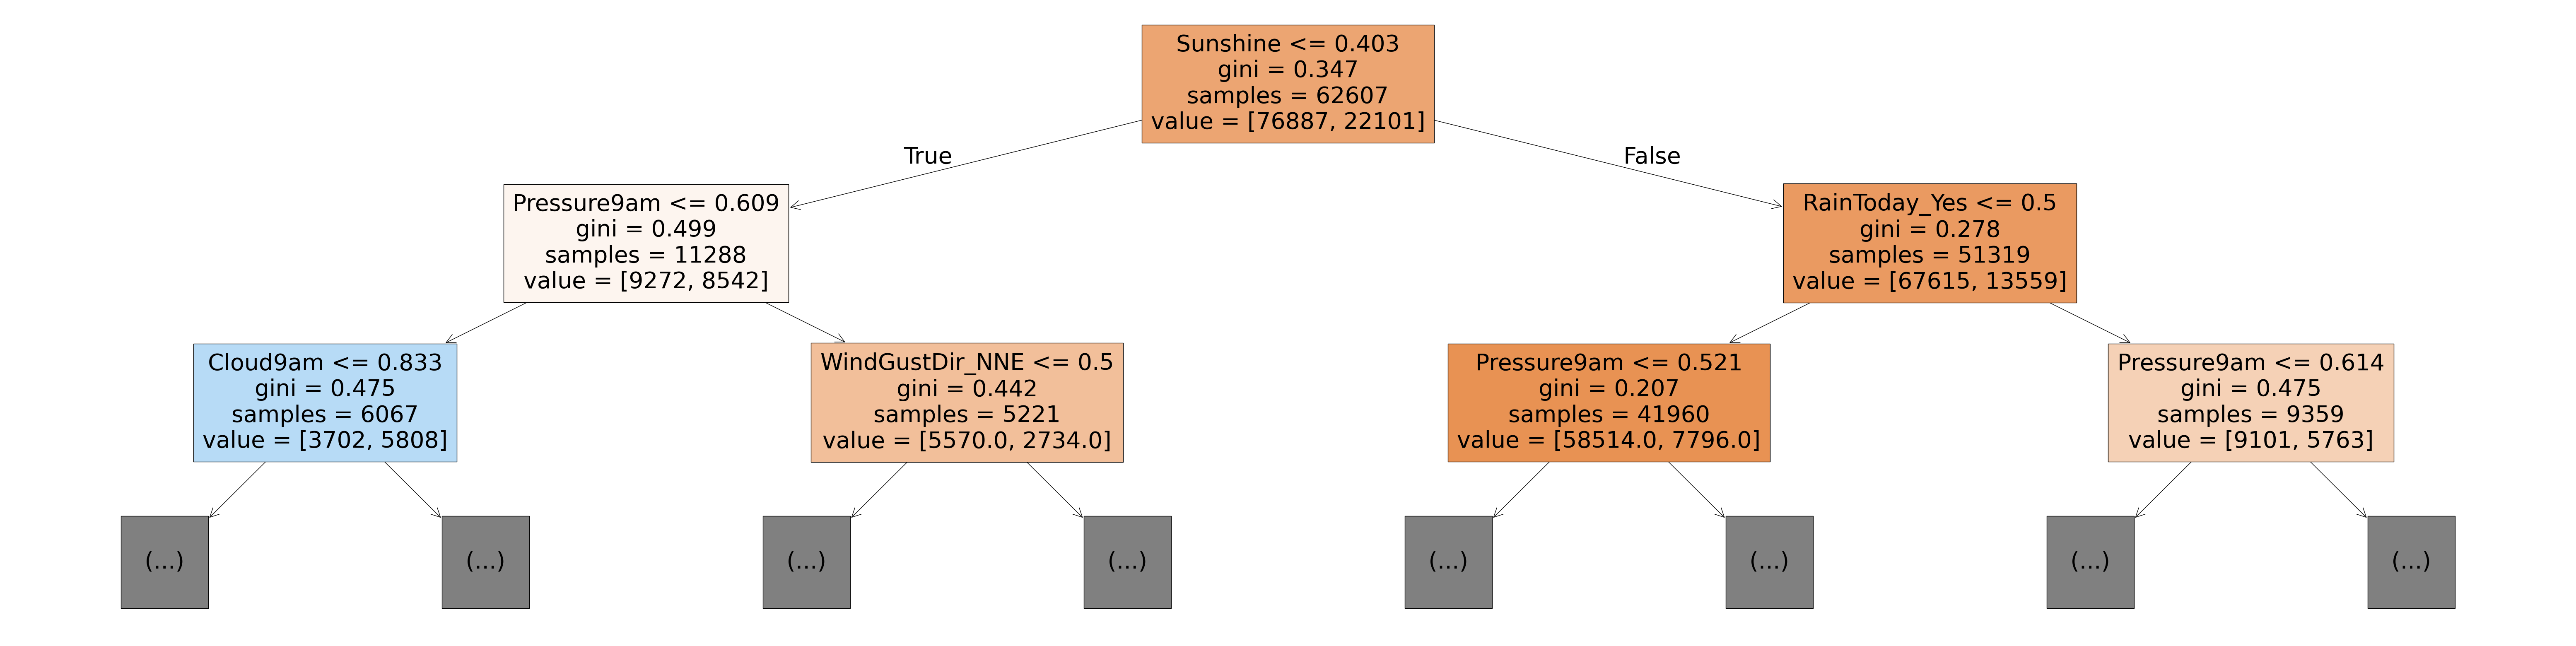

In [72]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[0] , max_depth = 2 , feature_names = x_train.columns,filled = True)
plt.show()

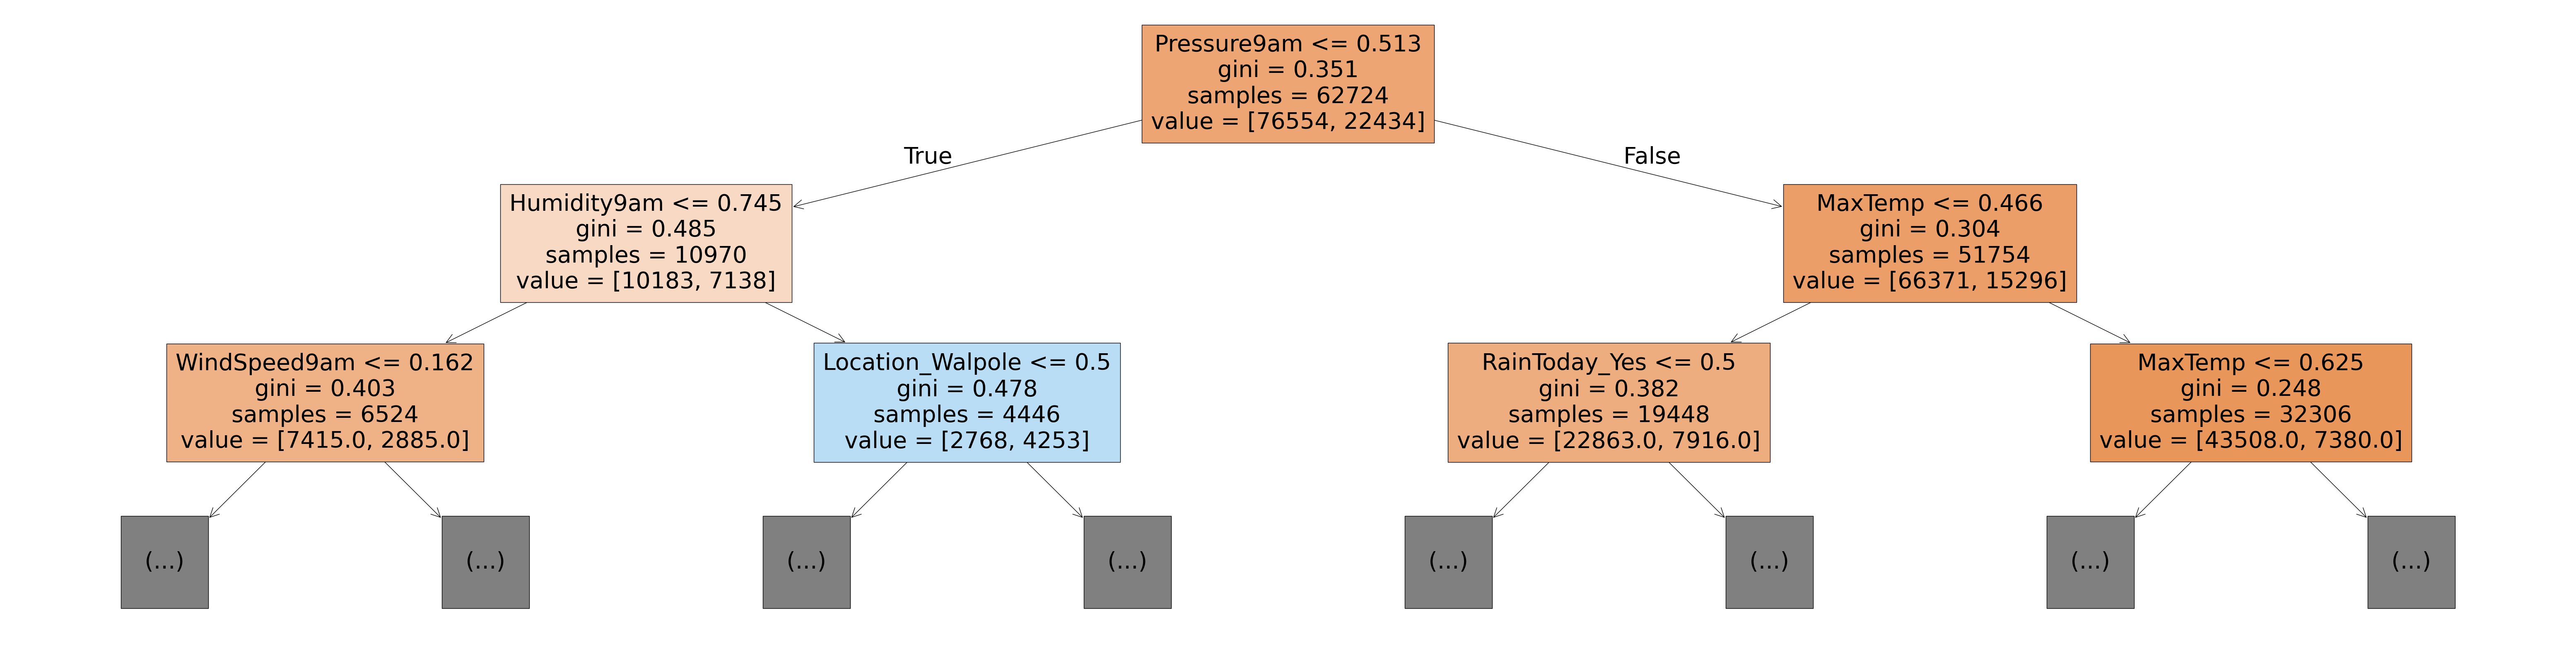

In [73]:
plt.figure(figsize = (80,20))
plot_tree(model.estimators_[50] , max_depth = 2 , feature_names = x_train.columns,filled = True)
plt.show()

In [74]:
importance_df = pd.DataFrame({
    'feature' : x_train.columns , 
    'importance' : model.feature_importances_,}).sort_values('importance' , ascending = False)

In [75]:
importance_df[0:10]

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077
10,Pressure9am,0.047944
5,WindGustSpeed,0.047477
15,Temp3pm,0.044379
1,MaxTemp,0.041865
0,MinTemp,0.041199


**HYPERPARAMETER TUNING with Random Forests**

In [76]:
base_model = RandomForestClassifier(random_state = 42 , n_jobs = -1).fit(x_train , train_targets)

In [77]:
base_train_acc = base_model.score(x_train , train_targets)
base_val_acc = base_model.score(x_val , val_targets)

In [78]:
base_acc = base_train_acc , base_val_acc
base_acc

(0.9999494888269285, 0.8566537055307295)

**n-estimators - controls no of decision trees in random forest**

In [79]:
model = RandomForestClassifier(random_state = 42 , n_jobs = -1 , n_estimators = 50)

In [80]:
model.fit(x_train,train_targets)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [81]:
model.score(x_train,train_targets)

0.9996464217884996

In [82]:
model.score(x_val,val_targets)

0.8561313910974406

In [96]:
def test_params(**params):
    model = RandomForestClassifier(random_state = 42 , n_jobs = -1 , **params).fit(x_train,train_targets)
    training_score = model.score(x_train,train_targets)
    validation_score = model.score(x_val,val_targets)
    return {'Training Score' : training_score , 'Validation Score' : validation_score}
    

In [97]:
#data = list(optimal_n_estimator(md) for md in range(10,200))
#optimal_df = pd.DataFrame(data) 
    

In [98]:
#plt.figure(figsize = (80,20))
#plt.plot(optimal_df['N-Estimator'] ,optimal_df['Training Error'])
#plt.plot(optimal_df['N-Estimator'] ,optimal_df['Validation Error'])
#plt.legend()


**Try for max_depth and max_leaf_nodes**

In [100]:
#min_samples_split - node only split if no of rows in it greater than given
#min_samples_leaf = node only split if leaf nodes have more than given no of sample
test_params(min_samples_split = 5 , min_samples_leaf = 2)

{'Training Score': 0.9573584676930537, 'Validation Score': 0.855144797167895}

**min impurity Decrease**

In [108]:
test_params(min_impurity_decrease = 1e-6)

{'Training Score': 0.9888168262819735, 'Validation Score': 0.8561313910974406}

In [111]:
test_params(bootstrap = False)

{'Training Score': 0.9999797955307714, 'Validation Score': 0.8567697754047937}

In [112]:
test_params(max_samples = 0.9)

{'Training Score': 0.9997676486038711, 'Validation Score': 0.8565376356566653}